# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

El proposito del proyecto es llevar a cabo el análisis exploratorio del dataset que nos presentan y generar conclusiones que den valor

## Inicialización

Para realizar nuestro análisis vamos a cargar las siguientes librerias:

1. Pandas (Análisis y manipulación de datos)
2. Numpy (Cálculo Numérico)
3. Pyplot (Visualizaciones)

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar datos

Cargamos los datos desde el archivo csv

In [2]:
# Carga el archivo de datos en un DataFrame
data = pd.read_csv('data/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Vemos un resumen del dataset y una muestra de 10 elementos

In [3]:
# imprime la información general/resumida sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Podemos notar que contamos con 13 columnas de datos y con un total de 51525 filas. A primera vista se necesita cambiar el tipo de dato de `date_posted` a fecha ya que esta en tipo string y tambien de `is_4wd` ya que deberia ser booleano. Tambien deberiamos hacer ajustes en las columnas `model_year`, `cylinders` y `odometer` ya que funcionarian mejor como enteros que como flotantes.

In [5]:
data.isna().sum() / data.shape[0] * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

Respecto a valores ausentes, tenemos que las columnas `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd`presentan esta situaciòn. La columna `is_4wd`presenta el mayor número de ausentes con un 50% de los datos faltantes

### Conclusiones iniciales y próximos pasos

Como pudimos ver, tenemos bastante información para poder hacer nuestro análisis, sin embargo hay puntos criticos que tenemos que resolver antes de proceder (por ejemplo, los valores ausentes). En un primer momento, que la columna `is_4wd` tenga casi la mitad de valores ausentes puede resultar alarmante, sin embargo al ser una columna booleana es razonable pensar que los valores vacios son False o 0 (viendo la distrubición apoya esta teoria).

Dicho esto, nuestros siguientes pasos seran:

1. Resolver los valores asuentes en el dataset
2. Ajustar las columnas que identificamos a un tipo más acorde para el análisis

## Tratar los valores ausentes (si hay)

Empecemos con los valores ausentes. Tenemos las siguientes columnas y las hipotesis de porque tienen datos ausentes:

1. `is_4wd`: Los datos ausentes representan los vehiculos que no tiene tracción a las 4 ruedas  (False)
2. `model_year`: Puede ser un error al ingresar los datos, que el dueño desconozca esta fecha o quiera ocultarla intencionalmente o que el año del vehiculo es más viejo a cierto año
3. `cylinders`: Pueder ser un error al ingresar los datos o el dueño desconocia este dato de su vehiculo
4. `odometer`: Pueder ser un error al ingresar los datos o el dueño no quiso revelar esta información
5. `paint_color`: Puede ser un error al ingresar los datos

In [6]:
## Columna is_4wd

# Cambiamos todos los valores vacios a valores con valor 0 para convertir luego esta columna a booleno
data.is_4wd = data.is_4wd.fillna(0)
# Verificamos que la columna ya no tenga valores ausentes
print('Valores ausentes en la columna:', data.is_4wd.isna().sum())
print()
# Vemos la distribución de los datos
print(data.is_4wd.value_counts())

Valores ausentes en la columna: 0

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64


In [7]:
## Columna model_year

# Checamos los datos presentes en la columna
data.model_year.unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

Podemos ver que tenemos autos de todas las epocas, incluso de los años 20s! Habra que checar esas filas más adelante sin embargo esto nos hace ver que nuestra hipotesis de que los vacios eran para identificar a vehiculos viejos queda descartada; sin embargo al ver que hay autos tan viejos en la lista otra hipotesis que surge es que los dueños realmente no saben el año del auto.

In [8]:
# Checamos el porcentaje de ausentes que representan para esta columna
data.model_year.isna().sum() / data.shape[0] * 100

7.023774866569626

Ya que no podemos inferir el año del auto y representan el 7% del total de la columna, se decide borrar estos datos del dataset.

In [9]:
# Borramos las filas del dataset
data = data[data.model_year.notnull()]

# Verificamos que la columna ya no tenga datos ausentes
print('Valores ausentes en la columna:', data.model_year.isna().sum())

Valores ausentes en la columna: 0


In [10]:
## Columna cylinders

# Checamos los datos presentes en la columna
print(data.cylinders.value_counts(dropna=False))
print()
# Checamos el porcentaje de ausentes que representan para esta columna
print('% de ausentes en cylinders:', data.cylinders.isna().sum() / data.shape[0] * 100)

8.0     14705
6.0     14648
4.0     12856
NaN      4897
10.0      517
5.0       248
3.0        33
12.0        2
Name: cylinders, dtype: int64

% de ausentes en cylinders: 10.222101615664009


Como podemos observar tenemos 4897 datos ausentes que representan el 10% de nuestros datos totales. A diferencia de la otra columna, poder inferir los cilindros de los autos gracias a nuestra columna de modelos. Generalmente los modelos de autos conservan los mismos cilindros a traves de los años con algunas excepciones, por lo que podemos generar una tabla con los modelos y sus cilindros y ocuparla para rellenar nuestros datos

In [11]:
# Creamos una tabla con los modelos y su mediana de cilindros
cylinders_bymodel = data[data.cylinders.notnull()].groupby(['model'])['cylinders'].median()
cylinders_bymodel

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

In [12]:
#  Función que usaremos para completar los valores ausentes
def llenado_cylinders(row):
    cylinders = row['cylinders']
    model = row['model']
    if np.isnan(cylinders):
        try:
            mediana = cylinders_bymodel.xs(model)
            return mediana
        except:
            return float("nan")
    else:
        return cylinders

In [13]:
# Comprobamos si funciona
## Creamos una dataset de pruebas
data_prueba = {'model':["bmw x5", 'ford f-150', 'ram 1500'],  
               'cylinders':[float("nan"), float("nan"), 6]}
df_prueba = pd.DataFrame(data_prueba)
df_prueba

,model,cylinders
0,bmw x5,NaN
1,ford f-150,NaN
2,ram 1500,6.0


In [14]:
## Aplicamos la función al dataset de prueba y verificamos
df_prueba['cylinders'] = df_prueba.apply(llenado_cylinders, axis=1)
df_prueba

,model,cylinders
0,bmw x5,6.0
1,ford f-150,8.0
2,ram 1500,6.0


In [15]:
# Aplícalo a cada fila
data['cylinders'] = data.apply(llenado_cylinders, axis=1)

# Comprueba si tenemos algún error
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7343
transmission       0
type               0
paint_color     8615
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Como podemos observar, hemos podido rellenar cada uno de nuestros datos en la columna `cylinders`.

In [16]:
## Columna odometer

# Checamos los datos presentes en la columna
print(data.odometer.value_counts(dropna=False))
print()
# Checamos el porcentaje de ausentes que representan para esta columna
print('% de ausentes en odometer:', data.odometer.isna().sum() / data.shape[0] * 100)

NaN         7343
0.0          172
140000.0     169
130000.0     162
120000.0     160
            ... 
49478.0        1
168235.0       1
62727.0        1
91490.0        1
139573.0       1
Name: odometer, Length: 16901, dtype: int64

% de ausentes en odometer: 15.327933870496388


Aqui nos enfrentamos con una columna numerica con muchos datos diferentes, sin embargo podemos notar que 7,343 son ausentes y representan el 15% de la información.

Al igual que en la columna anterior podemos inferir el numero promedio de millaje del vehiculo basandonos en el año de este.

<AxesSubplot:title={'center':'odometer'}, xlabel='model_year'>

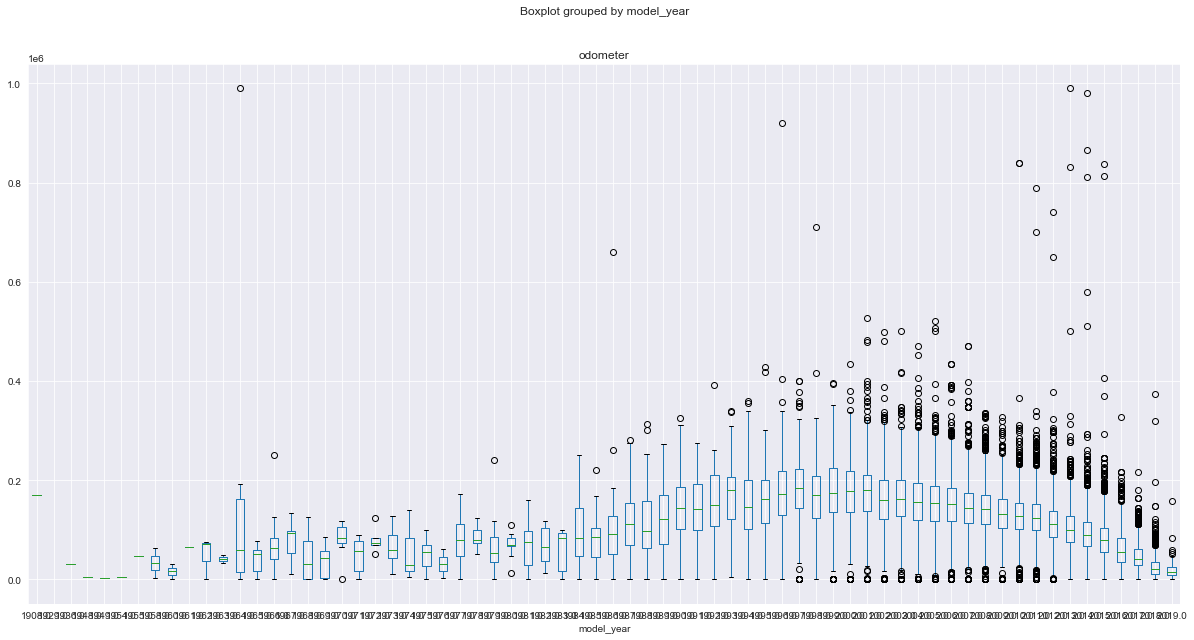

In [17]:
# Creamos un grafico de boxplot para ver la distribución de la columna
data.boxplot(column='odometer', by='model_year', figsize=(20,10))

A pesar de que el grafico es pequeño, podemos ver claramente que hay muchisimos datos atipicos en la columna, debido a esto usaremos la mediana para rellenar la columna

In [18]:
# Creamos una tabla agrupada por los años de los vehiculos con mediana
odometer_byyear = data[data.odometer.notnull()].groupby(['model_year']).odometer.median()
odometer_byyear

model_year
1908.0    169328.0
1936.0     30000.0
1948.0      4000.0
1949.0      1800.0
1954.0      3565.0
            ...   
2015.0     78514.0
2016.0     54000.0
2017.0     41000.0
2018.0     20627.0
2019.0     14151.5
Name: odometer, Length: 67, dtype: float64

In [19]:
#  Función que usaremos para completar los valores ausentes
def llenado_odometer(row):
    odometer = row['odometer']
    year = row['model_year']
    if np.isnan(odometer):
        try:
            mediana = odometer_byyear.xs(year)
            return mediana
        except:
            return float("nan")
    else:
        return odometer
    
# Comprobamos si funciona
## Creamos una dataset de pruebas
data_prueba = {'model_year':[2017, 1997, 2000, 1998],  
               'odometer':[float("nan"), float("nan"), 10000, float("nan")]}
df_prueba = pd.DataFrame(data_prueba)
df_prueba

,model_year,odometer
0,2017,NaN
1,1997,NaN
2,2000,10000.0
3,1998,NaN


In [20]:
## Aplicamos la función al dataset de prueba y verificamos
df_prueba['odometer'] = df_prueba.apply(llenado_odometer, axis=1)
df_prueba

,model_year,odometer
0,2017,41000.0
1,1997,183533.0
2,2000,10000.0
3,1998,170592.0


In [21]:
# Aplícalo a cada fila
data['odometer'] = data.apply(llenado_odometer, axis=1)

# Comprueba si tenemos algún error
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           1
transmission       0
type               0
paint_color     8615
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Como podemos observar, pudimos rellenar todos los datos a excepción de uno, veamos porque y en caso de que no podamos rellenarlo se eliminara

In [22]:
# Vemos la fila que no se relleno
data[data.odometer.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


In [23]:
# Verificamos si el año viene en nuestra tabla
try:
    odometer_byyear.xs(1929)
except:
    print('Dato no encontrado')

Dato no encontrado


El año 1929 no viene en nuestra tabla de llenado, por lo que no pudo rellenarlo con su dato correspondiente. Para rellenar este dato, podemos generar la mediana de los autos que esten en la decado de los 20s o 30s

In [24]:
# Rellenamos el dato con la mediana de esa epoca
data.odometer = data.odometer.fillna(data[data.odometer.notnull()].query('model_year < 1940 and model_year > 1920').odometer.median())

# Comprueba si tenemos algún error
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color     8615
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

La columna `odometer` esta libre de datos ausentes. Ahora pasaremos a nuestra ultima columna.

In [25]:
## Columna paint_color

# Checamos los datos presentes en la columna
print(data.paint_color.value_counts(dropna=False))
print()
# Checamos el porcentaje de ausentes que representan para esta columna
print('% de ausentes en paint_color:', data.paint_color.isna().sum() / data.shape[0] * 100)

white     9324
NaN       8615
black     7176
silver    5811
grey      4686
blue      4143
red       4138
green     1278
brown     1120
custom    1074
yellow     239
orange     207
purple      95
Name: paint_color, dtype: int64

% de ausentes en paint_color: 17.983133636705215


Nuestra ultima columna por revisar es categorica, con 8615 valores ausentes que representan el 17.9% de nuestros datos. Ya que no podemos saber el color del carro por alguna de nuestras columnas podriamos eliminar estos datos, sin embargo al ser el 18% de los datos perderiamos mucha información.

Ya que es categorica, nuestra opción con este panorama es crear una nueva categoria para estos carros "not specified". Con esto podemos conservar nuestros datos y le agregamos una etiqueta que podria ser de importancia para nuestro análisis.

In [26]:
# Remplazamos los datos vacios con nuestra nueva categoria
data.paint_color = data.paint_color.fillna('not_specified')

# Comprueba si tenemos algún error
print(data.isna().sum())
print()

print(data.paint_color.value_counts(dropna=False))

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

white            9324
not_specified    8615
black            7176
silver           5811
grey             4686
blue             4143
red              4138
green            1278
brown            1120
custom           1074
yellow            239
orange            207
purple             95
Name: paint_color, dtype: int64


Con este ajuste, hemos logrado limpiar nuestro dataset de datos ausentes. Podemos continuar con nuestro analisis

## Corregir los tipos de datos

A continuación, procederemos a cambiar el tipo de dato de las siguientes columnas:

1. `date_posted` a datetime
2. `is_4wd` a boolean
3. `model_year` a int
4. `cylinders` a int 
5. `odometer` a int

In [27]:
## Columna date_posted

# Cambiamos el tipo a fecha
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

# Verificamos que el cambio este hecho
print(data.date_posted.head())
print()
print(data.info())

0   2018-06-23
2   2019-02-07
3   2019-03-22
4   2019-04-02
5   2018-06-20
Name: date_posted, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         47906 non-null  object        
 3   condition     47906 non-null  object        
 4   cylinders     47906 non-null  float64       
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  float64       
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  float64       
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
dtypes: datetime64[ns](1

In [28]:
## Columna is_4wd

# Checamos como esta el dato original
print(data.is_4wd.head())
print()
print(data.info())

# Cambiamos el tipo a boolean
data['is_4wd'] = data['is_4wd'].astype('boolean')

# Verificamos que el cambio este hecho
print(data.is_4wd.head())
print()
print(data.info())

0    1.0
2    0.0
3    0.0
4    0.0
5    1.0
Name: is_4wd, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         47906 non-null  object        
 3   condition     47906 non-null  object        
 4   cylinders     47906 non-null  float64       
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  float64       
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  float64       
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory 

In [29]:
## Columna model_year

# Cambiamos el tipo a int
data['model_year'] = data['model_year'].astype('int')

# Verificamos que el cambio este hecho
print(data.model_year.head())
print()
print(data.info())

0    2011
2    2013
3    2003
4    2017
5    2014
Name: model_year, dtype: int32

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  int32         
 2   model         47906 non-null  object        
 3   condition     47906 non-null  object        
 4   cylinders     47906 non-null  float64       
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  float64       
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  boolean       
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
dtypes: boolean(1), datetime64[ns](1), float64(2), int32(1)

In [30]:
## Columna cylinders

# Cambiamos el tipo a int
data['cylinders'] = data['cylinders'].astype('int')

# Verificamos que el cambio este hecho
print(data.cylinders.head())
print()
print(data.info())

0    6
2    4
3    8
4    4
5    6
Name: cylinders, dtype: int32

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  int32         
 2   model         47906 non-null  object        
 3   condition     47906 non-null  object        
 4   cylinders     47906 non-null  int32         
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  float64       
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  boolean       
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
dtypes: boolean(1), datetime64[ns](1), float64(1), int32(2), int64(2), obje

In [31]:
## Columna odometer

# Cambiamos el tipo a int
data['odometer'] = data['odometer'].astype('int')

# Verificamos que el cambio este hecho
print(data.odometer.head())
print()
print(data.info())

0    145000
2    110000
3    161397
4     80903
5     57954
Name: odometer, dtype: int32

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  int32         
 2   model         47906 non-null  object        
 3   condition     47906 non-null  object        
 4   cylinders     47906 non-null  int32         
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  int32         
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  boolean       
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
dtypes: boolean(1), datetime64[ns](1), int32(3), in

Con este ultimo ajuste, hemos cambiado todas las columnas que identificamos a sus tipos correspondientes. Podemos continuar.

## Enriquecer datos

Para enriquecer y faciliar nuestro análisis, se agregaran los siguientes datos:

1. Día de la semana, mes y año en el que el anuncio se colocó
2. Años del vehículo cuando el anuncio se colocó
3. Millaje promedio del vehículo por año
4. Se remplazara los datos en la columna `condition` por números para identificar la condición del vehiculo

In [32]:
# Día de la semana, mes y año en el que el anuncio se colocó

# Dia de la semana
data['day_posted'] = pd.DatetimeIndex(data['date_posted']).weekday

# Mes
data['month_posted'] = pd.DatetimeIndex(data['date_posted']).month

# Año
data['year_posted'] = pd.DatetimeIndex(data['date_posted']).year

In [33]:
# Agrega los años del vehículo cuando el anuncio se colocó
data['years_car'] = data['year_posted'] - data['model_year']

In [34]:
# Agrega el millaje promedio del vehículo por año
data['miles_year'] = data['odometer'] / data['years_car']

Diccionario para la columna condition

- nuevo = 5
- como nuevo = 4
- excelente = 3
- bien = 2
- bastante = 1
- para rescate = 0

In [35]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

# Data original
print(data['condition'].value_counts())
print()

# Hacemos el cambio de valores
data.loc[data["condition"] == "excellent", "condition"] = 3
data.loc[data["condition"] == "good", "condition"] = 2
data.loc[data["condition"] == "like new", "condition"] = 4
data.loc[data["condition"] == "new", "condition"] = 5
data.loc[data["condition"] == "fair", "condition"] = 1
data.loc[data["condition"] == "salvage", "condition"] = 0

# Checamos que el cambio haya sido correcto
print(data['condition'].value_counts())

# Cambiamos el tipo de condition a entero
data['condition'] = data['condition'].astype('int')

excellent    23074
good         18695
like new      4409
fair          1492
new            133
salvage        103
Name: condition, dtype: int64

3    23074
2    18695
4     4409
1     1492
5      133
0      103
Name: condition, dtype: int64


Al agregar estas columnas, podremos generar información de mucho valor. Con las columnas de dia, mes y año podriamos hacer un análisis de que dia o mes tiene mayor auge de anuncios.

Con la columna de años del vehiculo podemos analizar como el precio se relaciona con los años de uso o cual es el promedio de años que los vehiculos tienen en la plataforma.

Finalmente, el hacer el cambio de palabras a números en la columna condition nos puede ayudar a hacer analisis cuatitativos y generar matrices de correlación para variables como el precio y ver su relación.

## Comprobar datos limpios

Hacemos una ultima comprobación de los datos y verificamos que todo esta en orden

In [36]:
# imprime la información general/resumida sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  int32         
 2   model         47906 non-null  object        
 3   condition     47906 non-null  int32         
 4   cylinders     47906 non-null  int32         
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  int32         
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  boolean       
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
 13  day_posted    47906 non-null  int64         
 14  month_posted  47906 non-null  int64         
 15  year_posted   47906 non-null  int64 

In [37]:
# imprimir una muestra de datos
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,years_car,miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,not_specified,True,2018-06-23,19,5,6,2018,7,20714.285714
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,161397,automatic,pickup,not_specified,False,2019-03-22,9,4,3,2019,16,10087.312500
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488.500000


## Estudiar parámetros principales

Para la primera parte de nuestro análisis vamos a estudiar los principales parámetros del dataframe, principalmente viendo su distribución y en caso de tener valores atípicos, tratarlos.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [38]:
# Funcion para la creación del histograma y la tabla resumida
def estudiar_parametros(parametro):
    data.hist(parametro)
    print(data[parametro].describe())

count     47906.000000
mean      12160.465203
std       10082.453773
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64


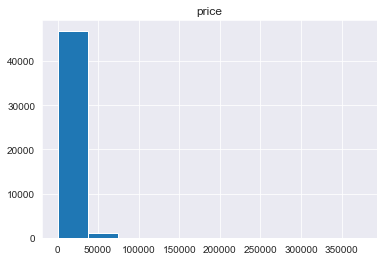

In [39]:
# Price
estudiar_parametros('price')

Como podemos ver en la gráfica del parámetro `price`, la mayoria de los datos estan agrupados entre el 0 y los 40,000 dolares, sin embargo nuestra grafica llega hasta los 350,000 dolares y viendo nuestra tabla vemos como nuestro valor máximo es 375000 dolares. Claramente tenemos valores atípicos pero no solo por arriba, podemos ver que nuestro valor minimo es un dolar y eso nos puede indicar claramente un valor atipico por debajo

count    47906.000000
mean         8.556966
std          6.295266
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: years_car, dtype: float64


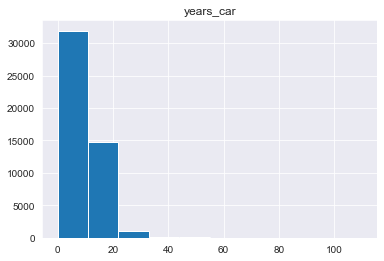

In [40]:
# Years_car
estudiar_parametros('years_car')

Como podemos ver en la grafica, la mayoria de nuestros datos estan agrupados entre 0 y 20 años, posterior a esos años tenemos muy pocos datos. Claramente este parametro presenta datos atípicos (el más alto de ellos, un auto con antiguedad de 110 años). Incluso apoyados por nuestra tabla vemos que el 75% datos estan agrupados antes de los 12 años de vida y por ultimo, al ver la desviación estandar podemos notar que tenemos 6 años de desviación respecto a la media, es una dispersión muy alta.

count     47906.000000
mean     115052.330648
std       62320.971109
min           0.000000
25%       73000.000000
50%      113883.500000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64


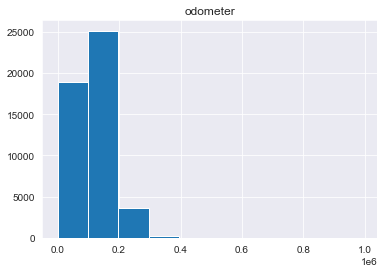

In [41]:
# Odometer
estudiar_parametros('odometer')

Al observar la grafica de nuestro parametro de millaje, podemos notar como nuestros datos estan principlamente agrupados entre el 0 y las 200,000 millas. Posterior a esto, tenemos varios datos dispersos hasta llegar a un máximo de 990000 millas; claramente nuestro parámetro tiene valores atípicos que tenemos que tratar

count    47906.000000
mean         6.121843
std          1.656820
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


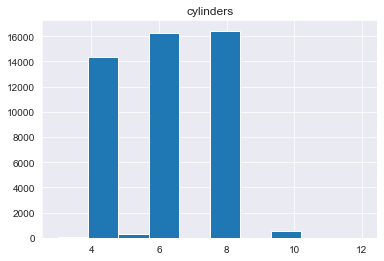

In [42]:
# Cylinders
estudiar_parametros('cylinders')

Pasando a nuestro parámetro de cilindros, podemos notar que los datos se agrupan principalmente en 4,6 y 8 cilindros mientras que para los demás valores tenemos algunos datos dispersos.

count    47906.000000
mean         2.638605
std          0.711839
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64


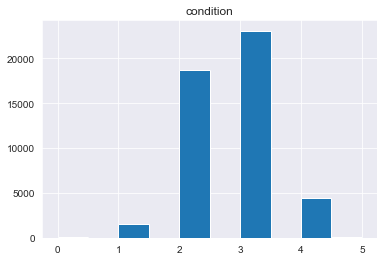

In [43]:
# condition
estudiar_parametros('condition')

Pasando a nuestro parámetro de condición del vehiculo, podemos notar que la mayoria de nuestros valores se agrupan principlamente en bien, excelente y como nuevo (2,3 y 4) mientras que para los demás valores tenemos algundos datos dispersos.

## Estudiar y tratar valores atípicos

Viendo los resultados anteriores, identificamos que los siguientes parametros tienen valores atípicos que necesitan ser tratados. Vamos a definir sus limites inferiores y superiores y cualquier dato por debajo o encima de esos limites sera eliminado.

- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje

In [44]:
# Definimos una función para sacar el IQR de cada parámetro.
def iqr(parametro):
    return data[parametro].quantile(0.75) - data[parametro].quantile(0.25)

In [45]:
# Determina los límites inferiores para valores atípicos
def limite_inferior(parametro):
    return data[parametro].quantile(0.25) - (1.5 * iqr(parametro))

In [46]:
# Determinar los límites superiores para valores atípicos
def limite_superior(parametro):
    return data[parametro].quantile(0.75) + (1.5 * iqr(parametro))

In [47]:
# Almacena los datos sin valores atípicos en un DataFrame separado
parametros = ['price', 'years_car', 'odometer']
data_sin_atipicos = data
for parametro in parametros:
    inferior = limite_inferior(parametro)
    superior = limite_superior(parametro)
    data_sin_atipicos = data_sin_atipicos[(data_sin_atipicos[parametro] > inferior) & (data_sin_atipicos[parametro] < superior)]

## Estudiar parámetros principales sin valores atípicos

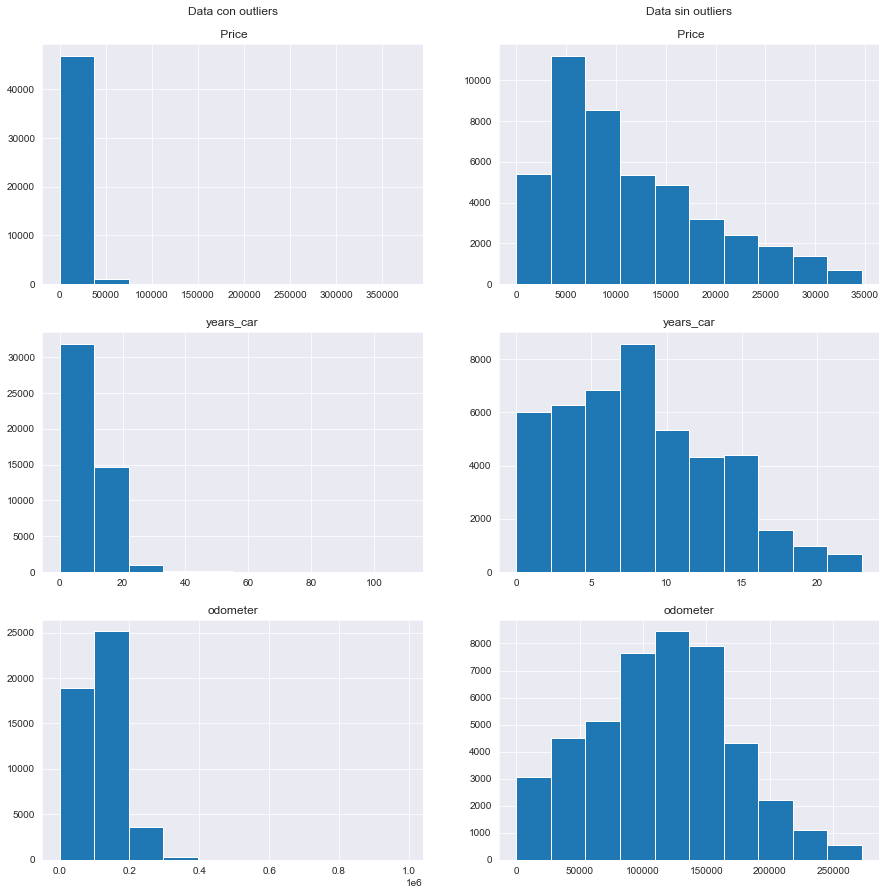

In [48]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
x = 0
y = 0

for parametro in parametros:
    axs[x,y].hist(x=parametro, data=data)
    axs[x,y+1].hist(x=parametro, data=data_sin_atipicos)
    if x == 0:
        axs[x, y].set_title('Data con outliers\n\n Price')
        axs[x, y+1].set_title('Data sin outliers\n\n Price')
    else:
        axs[x, y].set_title(parametro)
        axs[x, y+1].set_title(parametro)
    x += 1

Una vez eliminados los outliers podemos ver que las graficas cambiaron bastante respecto al paso anterior. 

Price (precio): Al eliminar los outliers, podemos notar como los picos de mayor oferta de automoviles es de entre los 5000 y los 10,000 dolares, mientras que los picos medios de ofeta van desde los 0 hasta los 4,000 dolares y luego de los 10,000 a los 17 0 18,000 dolares.

Years_car (años de antigüedad del automovil): Ya sin los outliers, podemos notar como el pico más alto de oferta son autos con una antigüedad de 7-8 años mientras que hay una oferta media de autos nuevos hasta pasando los 15 años, una vez pasados estos años la oferta decae abruptamente.

Odometer (millaje): Podemos notar en la nueva grafica, como el pico más alto de oferta son vehiculos con un millaje entre las 110,000 y las 130,000 millas mientras que la oferta de carros con mucho o poco millaje decae de ambos lados.

## Periodo de colocación de los anuncios

A continuación haremos un analisis de como se desarrollan los dias de colocación de anuncias, los tiempos que estan en la plataforma y que influye en ellos

La media de días publicados es: 39.554142110530414
La mediana de días publicados es: 33.0


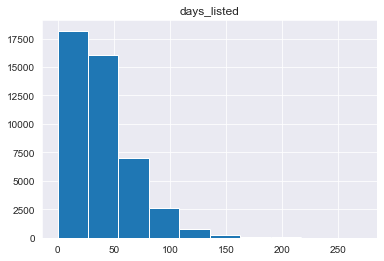

In [49]:
data_sin_atipicos.hist('days_listed')
print('La media de días publicados es:', data_sin_atipicos.days_listed.mean())
print('La mediana de días publicados es:', data_sin_atipicos.days_listed.median())

Como podemos ver, la mayoria de nuestros anuncios tienen una vida util entre los 0 dias y los 50-60 dias. En promedio, un anuncio esta 39 dias en la plataforma.

Unos detalles a considerar es que tenemos algunos anuncios que representan valores atipicos para nuestro parametro, el tiempo más largo que tenemos registrado son 271 dias. Por lo otro lado, tambien tenemos un alto número de anuncios que estan menos de 25 dias en la plataforma (algunos incluso el mismo dia que se publican, se eliminan del catalogo)

## Precio promedio por cada tipo de vehículo

En el siguiente apartado haremos un análisis del número de anuncios y precio promedio por cada uno de los tipos de vehiculo.

Veremos la dependencia de la cantidad de anuncios por tipo de vehiculo y generaremos algunos insights

In [50]:
# Tabla de precios promedio y cantidad de anuncios por tipo de vehiculo
tabla_precio_nanuncios = (data_sin_atipicos.groupby(['type'])['price']
.agg(['count', 'mean']).reset_index())
tabla_precio_nanuncios

,type,count,mean
0,SUV,11043,10465.436747
1,bus,21,18107.428571
2,convertible,316,12999.996835
3,coupe,1875,13565.886933
4,hatchback,934,6852.620985
5,mini-van,1065,8051.369014
6,offroad,173,14476.687861
7,other,211,10366.772512
8,pickup,5827,15131.135576
9,sedan,11187,7002.854563


Text(0, 0.5, 'Tipo de vehiculo')

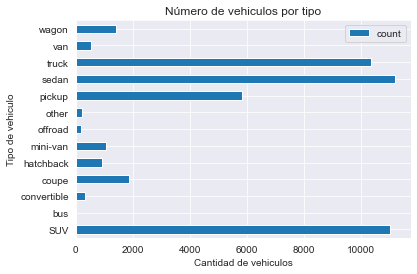

In [51]:
# Grafico para ver la dependencia de la cantidad de vehiculos por cada tipo
tabla_precio_nanuncios.plot(x='type', y='count', grid=True, kind='barh',
                            title='Número de vehiculos por tipo')
# Seteamos los label
plt.xlabel("Cantidad de vehiculos")
plt.ylabel("Tipo de vehiculo")

Como podemos observar en la gráfica, los vehiculos que más anuncios tienen son:
1. Sedan
2. SUV
3. Truck

Tambien, apoyados por nuestra tabla, podemos ver los vehiculos sedan son de los que tienen un precio promedio más barato, mientras que el tipo Truck es de lo más caros en promedio.

## Factores de precio

Para nuestro último análisis, vamos a ver que factores impactan más sobre el precio de los vehiculos. Para esto, seleccionaremos el top 2 tipos de vehiculos y estudiaremos los siguientes parametros (edad del vehiculo, millaje, condición, tipo de transmisión y color) y veremos que tanto influyen en nuestro precio final.

In [52]:
data_analisis = data.query("type == 'sedan' or type == 'SUV'")
data_analisis.type.value_counts()

SUV      11486
sedan    11306
Name: type, dtype: int64

Para las variables categóricas (tipo de transmisión y color) utilizaremos graficas de bigote para poder analizarlas. Aunado a esto, si alguna de las categorias no llega a un minimo de 50 datos, los eliminaremos del análisis.

In [53]:
# Verificamos si las categorias de nuestros parametros cumplen los 50 datos mínimos.
print(data_analisis.paint_color.value_counts())
print()
print(data_analisis.transmission.value_counts())

not_specified    4110
black            3733
silver           3354
white            3217
grey             2608
blue             2107
red              1734
green             587
brown             570
custom            563
orange             81
yellow             66
purple             62
Name: paint_color, dtype: int64

automatic    21485
manual        1032
other          275
Name: transmission, dtype: int64


<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

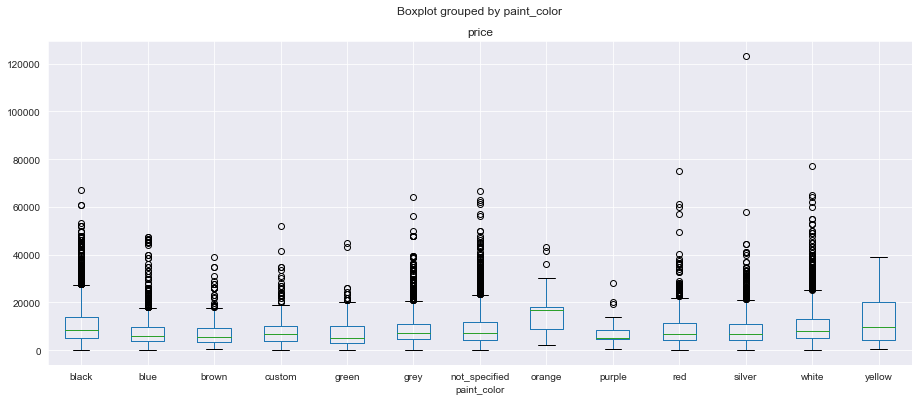

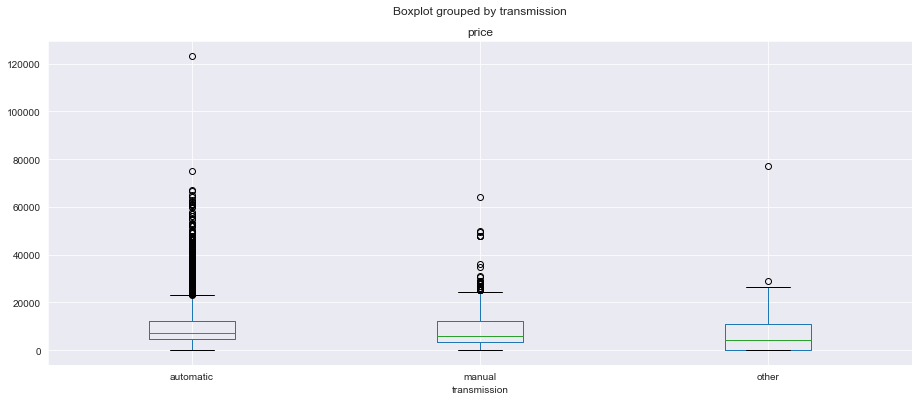

In [54]:
# Una vez verficadas nuestros parametros, hacemos las gráficas
data_analisis.boxplot(column="price", by="paint_color", figsize=(15,6))
data_analisis.boxplot(column="price", by="transmission", figsize=(15,6))

Viendo nuestros primeros gráficos, podemos notar los siguientes insights:

1. El tipo de color influye en el coste del vehiculo, podemos identificar que los colores negro, naranja y amarillo hacen que el precio se eleve en comparación a otros colores.

2. La transmisión automática tiende a ser un poco más cara que la manual, sin embargo vemos que entre categorias el precio no se mueve mucho por lo que no la consideramos clave para el precio

Para las variables númericas (edad del vehiculo, millaje y condición) utilizaremos matrices y diagramas de correlación.

In [55]:
# Seleccionamos las columnas para nuestro análisis
data_numerica = data_analisis[['price', 'odometer', 'condition', 'years_car']].reset_index(drop=True)
data_numerica.head()

,price,odometer,condition,years_car
0,9400,145000,2,7
1,5500,110000,4,6
2,14900,80903,3,2
3,14990,57954,3,4
4,12990,79212,3,3


In [56]:
print(data_numerica.corr())

              price  odometer  condition  years_car
price      1.000000 -0.455535   0.247414  -0.491072
odometer  -0.455535  1.000000  -0.323386   0.593039
condition  0.247414 -0.323386   1.000000  -0.315802
years_car -0.491072  0.593039  -0.315802   1.000000


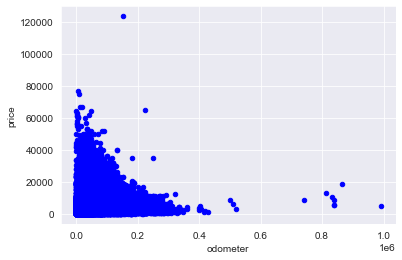

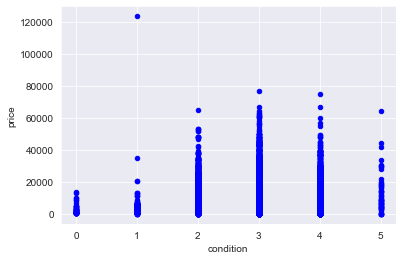

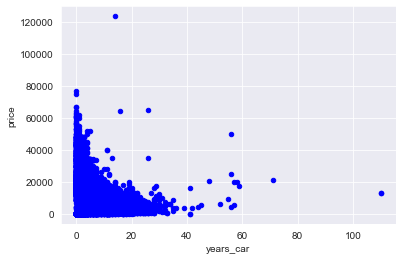

In [57]:
parametros = ['odometer', 'condition', 'years_car']

for parametro in parametros:
    data_numerica.plot(x=parametro, y='price', kind='scatter', c='blue')

Viendo nuestros gráficos y matriz de correlación, podemos notar los siguientes insights:

1. El precio tiene correlación negativa con el millaje, esto nos indica que mientras más millaje, el precio empieza a ir bajando; por lo que es un factor determinante.

2. Podemos notar que en el parámetro de condición, las categorias de 2 a 5 (bien a nuevo) son las que mayor precio presentan en comparación a las otras categorias, sin embargo consideramos que no es un factor ya que autos nuevos y casi nuevos tienen menores precios que autos con calidad 3 y que si fuera factor, se veria una tendencia

3. El precio tiene correlación negativa con la edad de los vehiculos; mientras más años tenga el carro, su precio sera más bajo. Esto nos hace considerarla como un factor determinante para el precio del vehiculo.

## Conclusión general

Una vez analizados los datos del sitio web, podemos dar estos insigths finales:

1. Las columnas con mayor porcentaje de valores ausentes son: `model_year`, `cylinders`, `odometer` y `paint_color`. Se recomienda hacer ajustes en el ingreso de estos datos para evitar el lo menos de posible que el usuario deje el espacio vacio. Tal vez agregando opciones predeterminadas o haciendolo campos obligatorios.

2. Los vehiculos más ofertado estan entre los 5,000 y 10,000 dolares, cuentan con una antiguedad de 7-8 años y con un millaje entre las 110,000 y 130,000 millas

3. Los anuncios tienen una media de 40 dias de publicación antes de que se eliminen por los usuarios.

4. Los tipos más ofertados en nuestro sitio web son el Sedan, SUV y Truck. Los tipos Sedan son los autos con precio más bajo mientras que los tipo Truck son de los más caros.

5. Los precios de los automoviles Sedan y SUV estan principalmente influenciados por el millaje, edad del vehiculo y el color de este (los colores negro, amarillo y naranja son los colores que más elevan el precio)